In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [2]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [3]:
train='dataset/train/'

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [5]:
val='dataset/train/'

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [7]:
test='dataset/test/'

In [8]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1279 files belonging to 4 classes.


In [9]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [10]:
train_data.class_names = class_names
val_data.class_names = class_names

In [11]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


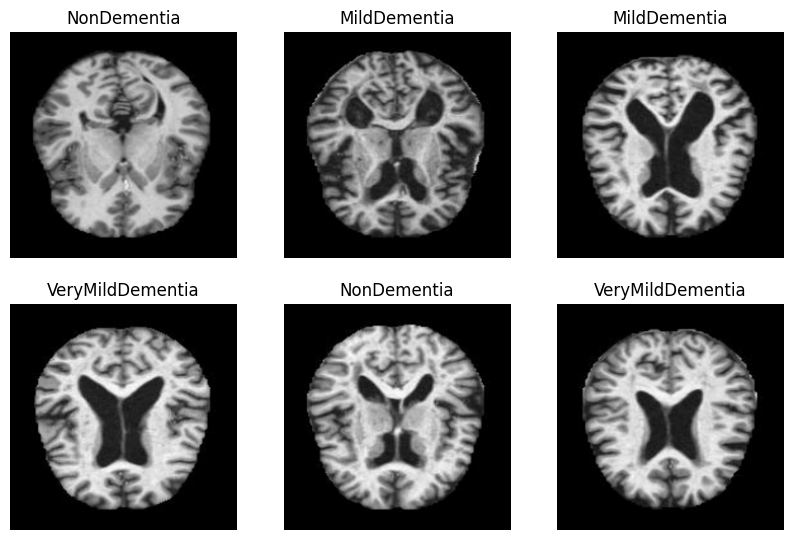

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image
from tqdm import tqdm
import glob
import cv2

In [15]:
vgg = VGG16(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)

In [18]:
folders = glob.glob(f'dataset/train/*')

In [19]:
print(len(folders))

4


In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
history = model.fit(train_data, validation_data=val_data, epochs=80)

Epoch 1/80
129/129 [==============================] - 50s 324ms/step - loss: 3.6709 - accuracy: 0.5118 - val_loss: 2.9718 - val_accuracy: 0.5977
Epoch 2/80
129/129 [==============================] - 40s 309ms/step - loss: 1.7548 - accuracy: 0.6524 - val_loss: 1.8406 - val_accuracy: 0.6621
Epoch 3/80
129/129 [==============================] - 40s 312ms/step - loss: 0.9572 - accuracy: 0.7481 - val_loss: 1.7215 - val_accuracy: 0.6582
Epoch 4/80
129/129 [==============================] - 41s 318ms/step - loss: 0.6005 - accuracy: 0.8143 - val_loss: 0.9946 - val_accuracy: 0.7510
Epoch 5/80
129/129 [==============================] - 44s 342ms/step - loss: 0.3339 - accuracy: 0.8831 - val_loss: 0.8903 - val_accuracy: 0.7725
Epoch 6/80
129/129 [==============================] - 42s 327ms/step - loss: 0.2058 - accuracy: 0.9234 - val_loss: 0.7659 - val_accuracy: 0.7920
Epoch 7/80
129/129 [==============================] - 42s 327ms/step - loss: 0.1468 - accuracy: 0.9485 - val_loss: 0.7133 - val_ac

Epoch 57/80
129/129 [==============================] - 40s 311ms/step - loss: 5.7587e-04 - accuracy: 1.0000 - val_loss: 0.3224 - val_accuracy: 0.9102
Epoch 58/80
129/129 [==============================] - 40s 313ms/step - loss: 5.1665e-04 - accuracy: 1.0000 - val_loss: 0.3174 - val_accuracy: 0.9102
Epoch 59/80
129/129 [==============================] - 40s 313ms/step - loss: 4.8346e-04 - accuracy: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.9141
Epoch 60/80
129/129 [==============================] - 41s 317ms/step - loss: 4.5079e-04 - accuracy: 1.0000 - val_loss: 0.3152 - val_accuracy: 0.9141
Epoch 61/80
129/129 [==============================] - 41s 316ms/step - loss: 4.1768e-04 - accuracy: 1.0000 - val_loss: 0.3155 - val_accuracy: 0.9150
Epoch 62/80
129/129 [==============================] - 42s 325ms/step - loss: 4.0249e-04 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9131
Epoch 63/80
129/129 [==============================] - 41s 316ms/step - loss: 3.8053e-04 - accuracy:

In [24]:
model.save("weight_4.h5")

In [25]:
model.evaluate(val_data)

32/32 [==============================] - 8s 247ms/step - loss: 0.2919 - accuracy: 0.9238


[0.29192304611206055, 0.923828125]

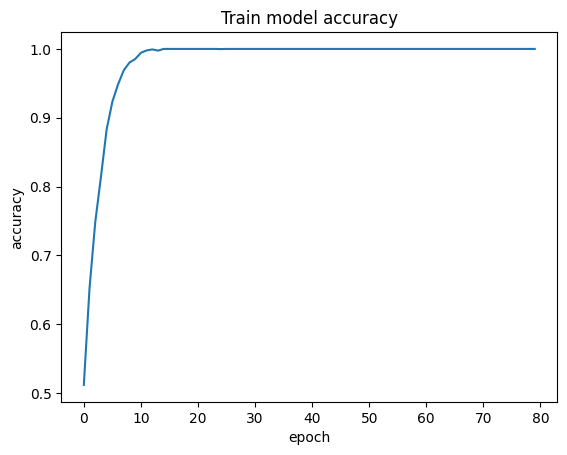

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

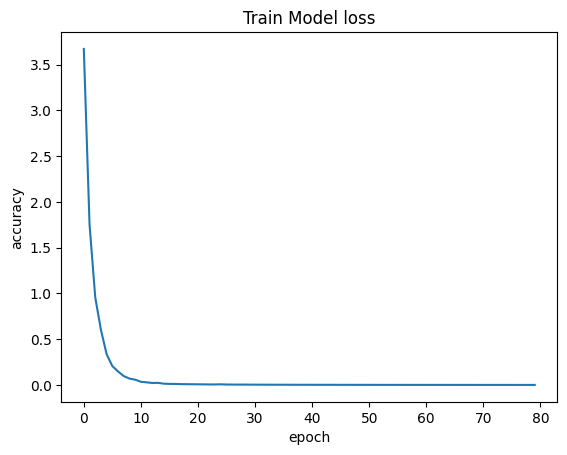

In [27]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

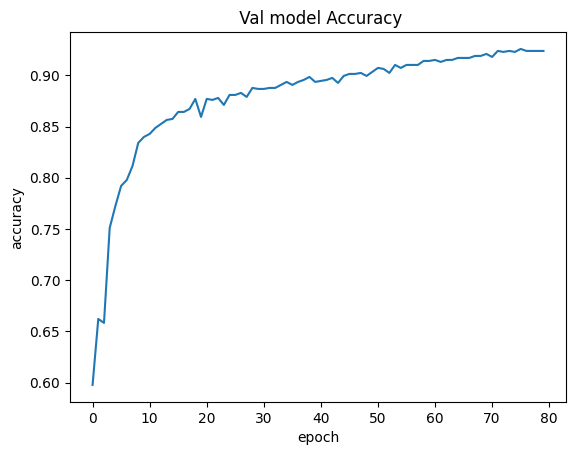

In [28]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

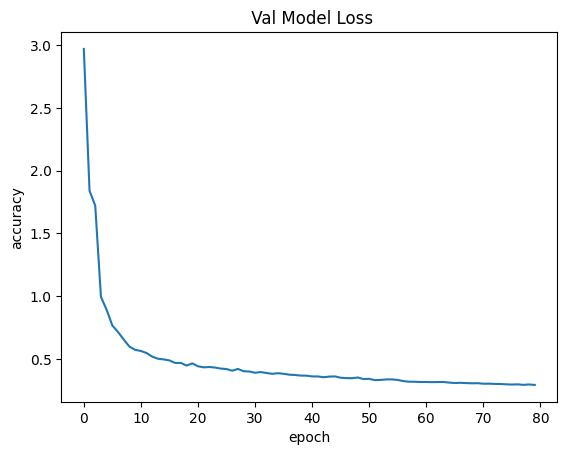

In [29]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

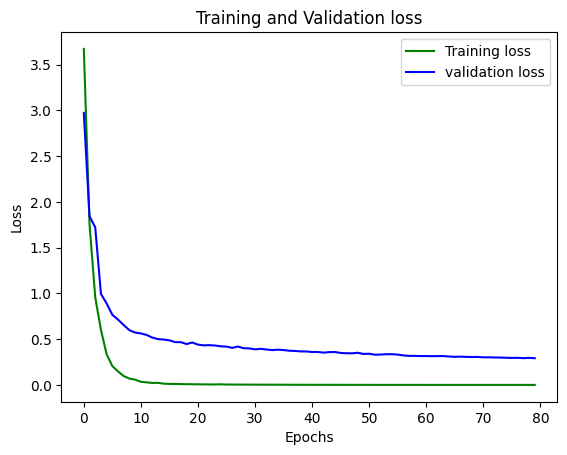

In [30]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

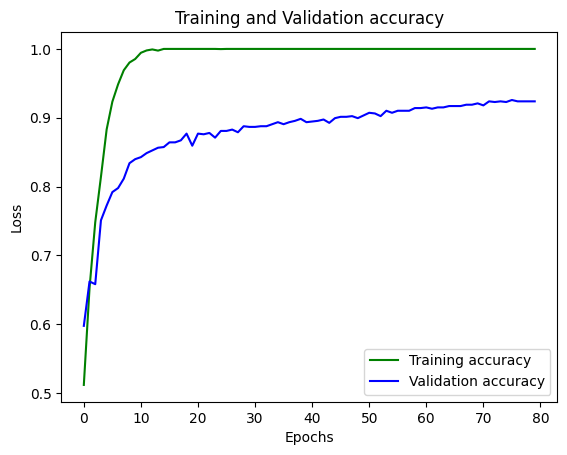

In [31]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
class_names={0:"MildDementia", 1:"ModerateDementia", 2:"NonDementia", 3:"VeryMildDementia"}

In [33]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Mild Dementia")
        elif p==1:
            print("Predicted Image: Moderate Dementia")
        elif p==2:
            print("Predicted Image: Non Dementia")
        else:
            print("Predicted Image: Very Mild Dementia")
        
        print("Predicted class:",p)

True_class: NonDementia
Predicted Image: Non Dementia
Predicted class: 2
True_class: VeryMildDementia
Predicted Image: Very Mild Dementia
Predicted class: 3
True_class: NonDementia
Predicted Image: Non Dementia
Predicted class: 2
True_class: NonDementia
Predicted Image: Non Dementia
Predicted class: 2
True_class: MildDementia
Predicted Image: Mild Dementia
Predicted class: 0
True_class: MildDementia
Predicted Image: Mild Dementia
Predicted class: 0
